# 2018-2019 Player Classification

In [115]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
def scrape_basketballreference(url):
    html = urlopen(url)
    soup = BeautifulSoup(html)
#     print(soup)
    soup.findAll('tr', limit=2)
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
    headers = headers[1:]
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
    stats = pd.DataFrame(player_stats, columns = headers)
    return stats

In [3]:
totals_0 = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')

In [4]:
totals = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')
# per_game = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
advanced = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')

In [5]:
advanced_0 = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')

In [6]:
# dropped some weird blank columns
# advanced.drop(advanced.columns[[18,23]], axis=1)

Find the columns that are the same name and determine if they're really the same

In [7]:
b = totals_0.columns.intersection(advanced_0.columns)
print(b)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP'], dtype='object')


## Columns analysis:

Same: 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP' 

Groupby: 'Player', 'Pos'

Drop: 'MP_adv', 'Pos_adv', 'Age_adv', 'Pos_pg', 'Age_pg', 'G_pg', 'GS_pg'

Sum: 'MP', 

Average: 

Custom: 'GS_pg', 'MP_pg',
       'FG_pg', 'FGA_pg', 'FG%_pg', '3P_pg', '3PA_pg', '3P%_pg', '2P_pg',
       '2PA_pg', '2P%_pg', 'eFG%_pg', 'FT_pg', 'FTA_pg', 'FT%_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg' (sum up MP for all teams and divide by number of games in season)

In [8]:
tmp = pd.merge(totals, advanced, how='inner', left_on=['Player', 'Pos', 'Tm', 'Age', 'G', 'MP'], right_on=['Player','Pos', 'Tm', 'Age', 'G', 'MP'])

In [9]:
tmp.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [10]:
tmp.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,...,,0.1,0.6,0.6,.053,,-3.7,0.4,-3.3,-0.2
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,...,,-0.1,0.0,-0.1,-0.022,,-7.6,-0.5,-8.1,-0.2
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,...,,-0.1,0.2,0.1,.011,,-3.8,-0.5,-4.3,-0.2
3,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,...,,5.1,4.0,9.1,.163,,0.7,0.4,1.1,2.1
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,...,,3.4,3.4,6.8,.171,,-0.4,2.2,1.8,1.8
5,Deng Adel,SF,21,CLE,19,3,194,11,36,.306,...,,-0.2,0.0,-0.2,-0.054,,-6.0,-1.6,-7.5,-0.3
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,22,3,10,.300,...,,-0.1,0.0,0.0,-0.051,,-7.9,2.1,-5.8,0.0
7,LaMarcus Aldridge,C,33,SAS,81,81,2687,684,1319,.519,...,,6.4,2.9,9.3,.167,,2.4,-0.6,1.8,2.6
8,Rawle Alkins,SG,21,CHI,10,1,120,13,39,.333,...,,-0.1,0.0,-0.1,-0.042,,-3.8,-3.5,-7.3,-0.2
9,Grayson Allen,SG,23,UTA,38,2,416,67,178,.376,...,,-0.4,0.4,0.0,.002,,-4.2,-2.1,-6.3,-0.5


In [11]:
# Find the columns where each value is null
empty_cols = [col for col in advanced.columns if advanced[col].empty]
# Drop these columns from the dataframe
advanced.drop(empty_cols,
        axis=1,
        inplace=True)

In [12]:
advanced.head(15)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,588,6.3,.507,.809,.083,...,,0.1,0.6,0.6,.053,,-3.7,0.4,-3.3,-0.2
1,Quincy Acy,PF,28,PHO,10,123,2.9,.379,.833,.556,...,,-0.1,0.0,-0.1,-0.022,,-7.6,-0.5,-8.1,-0.2
2,Jaylen Adams,PG,22,ATL,34,428,7.6,.474,.673,.082,...,,-0.1,0.2,0.1,.011,,-3.8,-0.5,-4.3,-0.2
3,Steven Adams,C,25,OKC,80,2669,18.5,.591,.002,.361,...,,5.1,4.0,9.1,.163,,0.7,0.4,1.1,2.1
4,Bam Adebayo,C,21,MIA,82,1913,17.9,.623,.031,.465,...,,3.4,3.4,6.8,.171,,-0.4,2.2,1.8,1.8
5,Deng Adel,SF,21,CLE,19,194,2.7,.424,.639,.111,...,,-0.2,0.0,-0.2,-0.054,,-6.0,-1.6,-7.5,-0.3
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,22,8.2,.322,.400,.200,...,,-0.1,0.0,0.0,-0.051,,-7.9,2.1,-5.8,0.0
7,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,.576,.032,.312,...,,6.4,2.9,9.3,.167,,2.4,-0.6,1.8,2.6
8,Rawle Alkins,SG,21,CHI,10,120,8.1,.418,.308,.308,...,,-0.1,0.0,-0.1,-0.042,,-3.8,-3.5,-7.3,-0.2
9,Grayson Allen,SG,23,UTA,38,416,7.5,.516,.556,.337,...,,-0.4,0.4,0.0,.002,,-4.2,-2.1,-6.3,-0.5


In [13]:
full = pd.merge(totals, advanced, how='inner', left_on=['Player', 'Pos', 'Tm', 'Age', 'G', 'MP'], right_on=['Player','Pos', 'Tm', 'Age', 'G', 'MP'])

In [14]:
full.shape

(1384, 51)

In [15]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [16]:
full[full.duplicated(keep=False)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
22,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
24,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
25,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
26,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
694,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
695,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
696,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
full_dedup = full.drop_duplicates()

Inspect the data _x and _y and clean up (renaming, dropping blank columns)

Getting duplicates because they played on different teams in the same season. So, use the TOT row for players with multiple teams over the season.

In [18]:
# full_dedup.replace('TOT', 'TOR')

In [19]:
full_dedup = full_dedup.sort_values('Player')

In [20]:
full_dedup['Tm'].unique()

array(['ORL', 'IND', 'OKC', 'BOS', 'POR', 'BRK', 'CLE', 'TOT', 'SAC',
       'UTA', 'LAL', 'ATL', 'GSW', 'NYK', 'PHI', 'DET', 'NOP', 'MEM',
       'MIN', 'CHI', 'HOU', 'WAS', 'LAC', 'MIA', 'CHO', 'MIL', 'DEN',
       'SAS', 'TOR', 'DAL', 'PHO', None], dtype=object)

In [21]:
full_dedup.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,,1.8,3.3,5.1,.093,,0.3,0.3,0.6,1.7
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,,0.1,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,,0.0,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,,4.5,2.9,7.5,.181,,3.3,1.9,5.1,3.6
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,,3.0,2.8,5.8,.121,,0.1,0.6,0.7,1.5
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,,0.1,0.1,0.2,.312,,7.6,4.2,11.8,0.1
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,,0.6,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,,0.7,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,,0.0,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,,0.2,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1


To extract only the 'TOT' row for players who played for multiple teams in the season, we've already sorted by player name. Now, let's create a column that counts the number of times the player exists. Then, create a binary value column indicating whether or not 'Tm' is 'TOT'. Final step is to loop row by row using iloc[index,:] and delete row if no. occurences > 1 AND 'Tm' != 'TOT'

In [22]:
full_dedup['is_TOT'] = full_dedup.Tm.apply(lambda x:1 if x=="TOT" else 0)

In [23]:
full_dedup.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,is_TOT
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,1.8,3.3,5.1,.093,,0.3,0.3,0.6,1.7,0
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,0.1,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1,0
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,0.0,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2,0
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,4.5,2.9,7.5,.181,,3.3,1.9,5.1,3.6,0
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,3.0,2.8,5.8,.121,,0.1,0.6,0.7,1.5,0
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,0.1,0.1,0.2,.312,,7.6,4.2,11.8,0.1,0
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,0.6,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1,0
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,0.7,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3,1
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,0.0,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0,0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,0.2,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1,0


In [24]:
full_dedup.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT'],
      dtype='object')

In [25]:
full_dedup['Player_count'] = full_dedup.groupby('Player')['Player'].transform('size')

In [26]:
full_dedup.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT', 'Player_count'],
      dtype='object')

In [27]:
full_dedup.head(10) # column is created!

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,3.3,5.1,.093,,0.3,0.3,0.6,1.7,0,1.0
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1,0,1.0
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2,0,1.0
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,2.9,7.5,.181,,3.3,1.9,5.1,3.6,0,1.0
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,2.8,5.8,.121,,0.1,0.6,0.7,1.5,0,1.0
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,0.1,0.2,.312,,7.6,4.2,11.8,0.1,0,1.0
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1,0,4.0
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3,1,4.0
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0,0,4.0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1,0,4.0


In [28]:
full_dedup.shape

(709, 53)

In [29]:
full_dedup_final = full_dedup[(full_dedup['is_TOT']==1)|((full_dedup['is_TOT']==0) & (full_dedup['Player_count']==1))]

In [30]:
full_dedup_final.shape

(530, 53)

In [31]:
full_dedup_final.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT', 'Player_count'],
      dtype='object')

In [32]:
full_dedup_final[full_dedup_final.columns[41]]

,,
922,,
973,,
1173,,
984,,
12,,
...,...,...
1199,,
1290,,
1227,,
0,,


In [33]:
full_dedup_final[full_dedup_final.columns[46]]

,,
922,,
973,,
1173,,
984,,
12,,
...,...,...
1199,,
1290,,
1227,,
0,,


In [34]:
full_dedup_final = full_dedup_final.drop(full_dedup_final.columns[[41,46]], axis=1)

In [35]:
full_dedup_final.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'is_TOT', 'Player_count'],
      dtype='object')

In [90]:
full_dedup_final.isnull().any()

Player          False
Pos             False
Age             False
Tm              False
G               False
GS              False
MP              False
FG              False
FGA             False
FG%             False
3P              False
3PA             False
3P%             False
2P              False
2PA             False
2P%             False
eFG%            False
FT              False
FTA             False
FT%             False
ORB             False
DRB             False
TRB             False
AST             False
STL             False
BLK             False
TOV             False
PF              False
PTS             False
PER             False
TS%             False
3PAr            False
FTr             False
ORB%            False
DRB%            False
TRB%            False
AST%            False
STL%            False
BLK%            False
TOV%            False
USG%            False
OWS             False
DWS             False
WS              False
WS/48           False
OBPM      

## PCA

We'll want to use PCA to reduce dimensionality since there are tons of features that we don't know necessarily which ones may be actually influential. It'll also be good to remove any features that may be highly correlated with another feature.

First, we'll need to drop all unnecessary columns before using PCA. We'll drop non-numeric columns unless they need to be one-hot-encoded. Player, Position, Age, and Team probably won't be important for classification. We can link back Player later after we do PCA since there is no good way to convert to numeric. We'll ignore position and see if we can classify in an unsupervised manner.

In [36]:
drop = ['Player','Pos', 'Age', 'Tm']
stats_train = full_dedup_final.drop(columns=drop)
stats_train.head()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
922,78,78,2633,470,1046,.449,121,347,.349,349,...,1.8,3.3,5.1,.093,0.3,0.3,0.6,1.7,0,1.0
973,50,0,646,105,262,.401,43,127,.339,62,...,0.1,0.8,0.9,.065,-1.7,0.1,-1.6,0.1,0,1.0
1173,61,1,694,91,215,.423,32,100,.320,59,...,0.0,0.9,0.9,.062,-3.6,0.3,-3.2,-0.2,0,1.0
984,68,68,1973,387,723,.535,73,203,.360,314,...,4.5,2.9,7.5,.181,3.3,1.9,5.1,3.6,0,1.0
12,81,81,2292,257,593,.433,96,280,.343,161,...,3.0,2.8,5.8,.121,0.1,0.6,0.7,1.5,0,1.0


In [ ]:
# data = full_dedup_final.drop(['Player','Pos', 'Age', 'Tm'], axis=1)

In [38]:
str_col = [col for col in stats_train.columns if stats_train[col].dtype=='object']

In [39]:
stats_train[str_col] = stats_train[str_col].apply(pd.to_numeric, errors='coerce')

In [40]:
stats_train.dtypes

G                 int64
GS                int64
MP                int64
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
2P                int64
2PA               int64
2P%             float64
eFG%            float64
FT                int64
FTA               int64
FT%             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
PTS               int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            

In [96]:
stats_train.isnull().sum()

G                0
GS               0
MP               0
FG               0
FGA              0
FG%              4
3P               0
3PA              0
3P%             36
2P               0
2PA              0
2P%             10
eFG%             4
FT               0
FTA              0
FT%             27
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
PER              0
TS%              4
3PAr             4
FTr              4
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             4
USG%             0
OWS              0
DWS              0
WS               0
WS/48            0
OBPM             0
DBPM             0
BPM              0
VORP             0
is_TOT           0
Player_count     0
dtype: int64

We've somehow introduced some null values in our data by converting all columns to numeric, which PCA won't like. Thus, we need to examine where the null values are. 

In [80]:
# indices where the 2P% is null
stats_train[stats_train['2P%'].isnull()].index.sort_values().tolist()

[869, 929, 978, 1046, 1082, 1089, 1273, 1278, 1330, 1353]

In [97]:
stats_train[stats_train['FTr'].isnull()]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
1046,1,0,6,0,0,NaN,0,0,NaN,0,...,0.0,0.0,0.0,-0.001,-5.8,-2.1,-7.9,0.0,0,1.0
978,1,0,1,0,0,NaN,0,0,NaN,0,...,0.0,0.0,0.0,-0.032,-3.4,-1.6,-5.0,0.0,0,1.0
1278,1,0,2,0,0,NaN,0,0,NaN,0,...,0.0,0.0,0.0,-0.033,-7.4,-3.2,-10.6,0.0,0,1.0
1330,1,0,1,0,0,NaN,0,0,NaN,0,...,0.0,0.0,0.0,-0.015,-7.7,-2.7,-10.4,0.0,0,1.0


In [91]:
stats_train[stats_train['3P%'].isnull()].index.sort_values().tolist()

[18,
 20,
 734,
 741,
 749,
 788,
 807,
 840,
 845,
 880,
 920,
 924,
 965,
 978,
 980,
 986,
 1009,
 1030,
 1036,
 1046,
 1057,
 1162,
 1179,
 1215,
 1216,
 1227,
 1243,
 1278,
 1299,
 1312,
 1320,
 1329,
 1330,
 1362,
 1380,
 1381]

In [89]:
stats_train.loc[1353,:]

G                3.000
GS               0.000
MP               6.000
FG               0.000
FGA              2.000
FG%              0.000
3P               0.000
3PA              2.000
3P%              0.000
2P               0.000
2PA              0.000
2P%                NaN
eFG%             0.000
FT               0.000
FTA              0.000
FT%                NaN
ORB              1.000
DRB              1.000
TRB              2.000
AST              0.000
STL              0.000
BLK              0.000
TOV              0.000
PF               0.000
PTS              0.000
PER             -4.500
TS%              0.000
3PAr             1.000
FTr              0.000
ORB%            17.800
DRB%            18.400
TRB%            18.100
AST%             0.000
STL%             0.000
BLK%             0.000
TOV%             0.000
USG%            14.100
OWS              0.000
DWS              0.000
WS               0.000
WS/48           -0.251
OBPM            -9.000
DBPM            -7.800
BPM        

Looks like a lot of columns the NaNs can be 0 since if there's no 2P or 3P scored, the respective percentages should be 0. Furthermore, a lot of these stats are from players who played a handful of games, so this may actually not be important data especially if we want to bucket players who were regular contributors both as starters or off the bench. I will just arbitrarily say if a player has played at least 20% of the season's games, then they'll be included (82/5 = ~16)

In [100]:
stats_train = stats_train[stats_train.G > 15]

In [101]:
stats_train.isnull().sum()

G                0
GS               0
MP               0
FG               0
FGA              0
FG%              0
3P               0
3PA              0
3P%             18
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
PER              0
TS%              0
3PAr             0
FTr              0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
WS               0
WS/48            0
OBPM             0
DBPM             0
BPM              0
VORP             0
is_TOT           0
Player_count     0
dtype: int64

This gets rid of most of our nulls but we still have 18 in 3P%. I suspect this is because there's tons of players who aren't 3 point shooters such as traditional Centers. Let's look at the data.

In [102]:
stats_train[stats_train['3P%'].isnull()]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
1380,59,25,1082,183,331,0.553,0,0,NaN,183,...,1.7,0.3,2.0,0.087,-1.1,-2.1,-3.2,-0.3,0,1.0
734,54,32,783,89,156,0.571,0,0,NaN,89,...,1.2,0.8,2.0,0.125,-2.4,0.0,-2.5,-0.1,0,1.0
788,67,67,2249,474,732,0.648,0,0,NaN,474,...,7.8,3.0,10.8,0.230,3.3,-0.3,3.0,2.8,0,1.0
1030,24,22,410,53,74,0.716,0,0,NaN,53,...,1.0,0.5,1.5,0.173,-0.6,1.7,1.1,0.3,0,1.0
1036,69,69,2047,286,446,0.641,0,0,NaN,286,...,4.0,3.1,7.1,0.167,0.8,1.3,2.1,2.1,1,3.0
880,23,0,113,15,26,0.577,0,0,NaN,15,...,0.1,0.2,0.3,0.120,-1.9,0.7,-1.3,0.0,0,1.0
1329,51,1,320,50,72,0.694,0,0,NaN,50,...,0.9,0.7,1.6,0.238,0.8,3.9,4.7,0.5,0,1.0
1381,59,37,1040,212,379,0.559,0,0,NaN,212,...,1.9,1.3,3.2,0.148,-0.2,-0.2,-0.5,0.4,1,3.0
1216,77,24,1273,187,290,0.645,0,0,NaN,187,...,3.5,1.6,5.1,0.193,1.3,0.7,2.0,1.3,0,1.0
1057,42,1,502,73,153,0.477,0,0,NaN,73,...,0.0,0.7,0.7,0.063,-3.6,0.2,-3.4,-0.2,0,1.0


As suspected, each of these 18 rows have 0 3-pointers. Let's sub the NaNs in the 3P% column to be 0

In [106]:
# stats_train['3P%'] = stats_train['3P%'].fillna(0)

stats_train.fillna({'3P%':0}, inplace=True)

/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [107]:
stats_train[stats_train['3P%'].isnull()]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count


#### Rescaling 

In [ ]:
# features = data.columns

In [ ]:
# X = data[features].values

In [ ]:
# X.columns

In [ ]:
# from sklearn.preprocessing import StandardScaler
# # data_rescaled = StandardScaler().fit_transform(X)
# stats_scaled=pd.DataFrame(scaler.fit_transform(X))
# stats_scaled.columns=X.columns

In [108]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_scaled=pd.DataFrame(scaler.fit_transform(stats_train))
stats_scaled.columns=stats_train.columns

In [111]:
stats_scaled.shape

(440, 47)

In [109]:
stats_scaled.isnull().any()

G               False
GS              False
MP              False
FG              False
FGA             False
FG%             False
3P              False
3PA             False
3P%             False
2P              False
2PA             False
2P%             False
eFG%            False
FT              False
FTA             False
FT%             False
ORB             False
DRB             False
TRB             False
AST             False
STL             False
BLK             False
TOV             False
PF              False
PTS             False
PER             False
TS%             False
3PAr            False
FTr             False
ORB%            False
DRB%            False
TRB%            False
AST%            False
STL%            False
BLK%            False
TOV%            False
USG%            False
OWS             False
DWS             False
WS              False
WS/48           False
OBPM            False
DBPM            False
BPM             False
VORP            False
is_TOT    

In [110]:
from sklearn.decomposition import PCA
n_components=stats_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled)

PCA(copy=True, iterated_power='auto', n_components=47, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [112]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.432968,0.432968
1,2,0.155437,0.588405
2,3,0.127787,0.716192
3,4,0.055410,0.771601
4,5,0.040362,0.811964
5,6,0.031395,0.843359
6,7,0.027927,0.871286
7,8,0.021567,0.892853
8,9,0.016311,0.909163
9,10,0.013298,0.922462


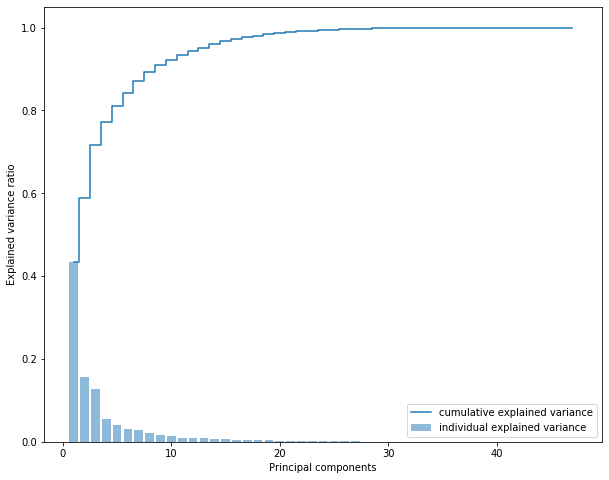

In [116]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

Pick n_components = 9 because explains 90% of cumulative variance 

In [117]:
pca = PCA(n_components=9)
pca.fit(stats_scaled)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [118]:
stats_transformed = pca.fit_transform(stats_scaled)
stats_transformed.shape

(440, 9)

### K-means

In [ ]:
from sklearn.cluster import KMeans


Covariance Matrix and Eigendecomposition

In [ ]:
import numpy as np

mean_vec = np.mean(data_rescaled, axis = 0)
cov_mat = (data_rescaled - mean_vec).T.dot((data_rescaled - mean_vec)) / (data_rescaled.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)

%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cov_mat, annot = True, fmt = 'g')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA.fit(data_rescaled)
reduced = PCA.transform(data_rescaled)